Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


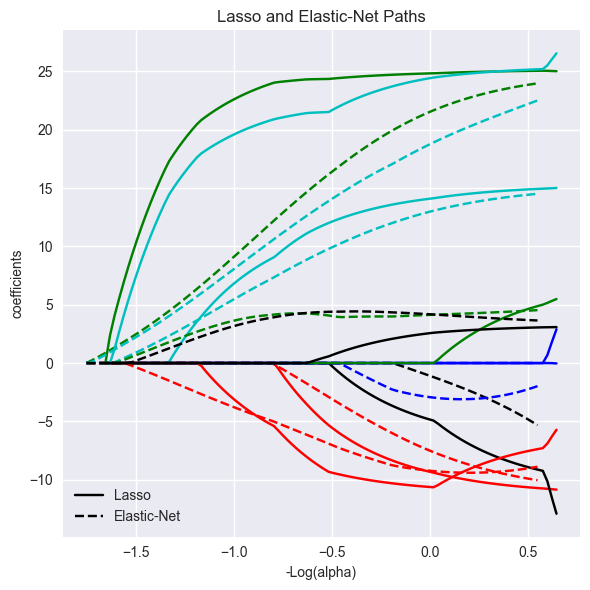

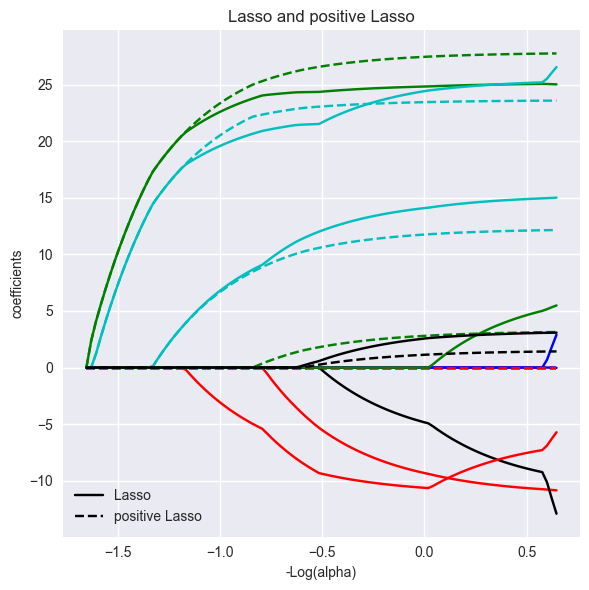

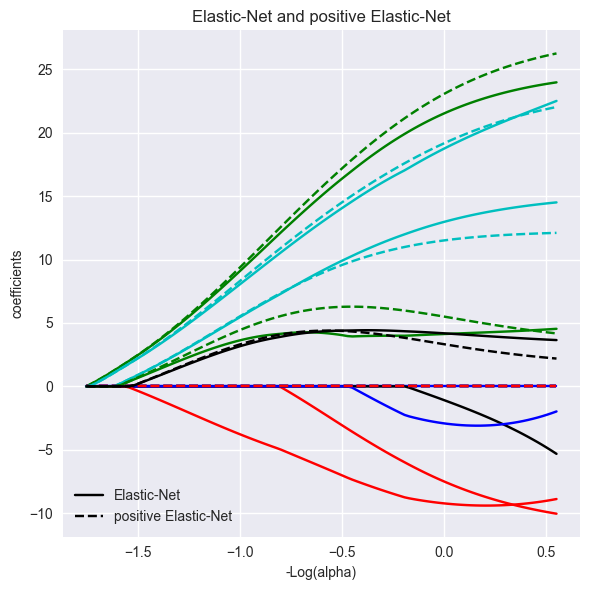

In [2]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入循环工具
from itertools import cycle
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入lasso系数路径
from sklearn.linear_model import lasso_path, enet_path
# 导入糖尿病数据集
from sklearn.datasets import load_diabetes
# 导入标准化工具
from sklearn.preprocessing import StandardScaler
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
X, y = load_diabetes(return_X_y=True, as_frame=True)
# 对X进行标准化
X = StandardScaler().fit(X).transform(X)
# 用于自动生成alpha
eps = 5e-3
print("Computing regularization path using the lasso...")
# lasso模型的路径
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)
print("Computing regularization path using the positive lasso...")
# positive lasso模型的路径
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
# elastic net模型的路径
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)
print("Computing regularization path using the positive elastic net...")
# positive elastic net模型的路径
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)
# 开始绘图
fig1, ax = plt.subplots(figsize=(6,6), tight_layout=True)
colors = cycle(["b", "r", "g", "c", "k"])
# 非负对数化
neg_log_alphas_lasso = -np.log10(alphas_lasso)
# 非负对数化
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = ax.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = ax.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

ax.set_xlabel("-Log(alpha)")
ax.set_ylabel("coefficients")
ax.set_title("Lasso and Elastic-Net Paths")
# 设置图例
ax.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.show()
fig1.savefig("../codeimage/code18.pdf")
# 开始绘图
fig2, ax = plt.subplots(figsize=(6,6), tight_layout=True)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = ax.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = ax.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

ax.set_xlabel("-Log(alpha)")
ax.set_ylabel("coefficients")
ax.set_title("Lasso and positive Lasso")
ax.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
fig2.savefig("../codeimage/code19.pdf")
# 开始绘图
fig3, ax = plt.subplots(figsize=(6,6), tight_layout=True)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = ax.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = ax.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

ax.set_xlabel("-Log(alpha)")
ax.set_ylabel("coefficients")
ax.set_title("Elastic-Net and positive Elastic-Net")
ax.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.show()
fig3.savefig("../codeimage/code20.pdf")
